## Setup

In [0]:
%pip install yfinance -qq

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
spark.sql('USE CATALOG cscie103_catalog_final')

DataFrame[]

## Now, we do some initial data exploration

In [0]:
# Quick Profile for all tables
def profile_bronze(table_name):
  print(f"Profiling table: {table_name}")
  spdf = spark.table(f"bronze.{table_name}")
  print("++++")
  # Total count of rows
  print(f"Total count of rows: {spdf.count()}")
  # get the count of rows that have null in any column
  for col in spdf.columns:
    null_count = spdf.filter(f"{col} IS NULL").count()
    if null_count > 0:    
      print(col)
      print(f"Null count for {col}: {null_count}")
      print("----")
  display(spdf.describe())
  
# Profile the table
df_tables = spark.sql("select table_name from information_schema.tables where table_schema = 'bronze'").collect()
for table in df_tables:
  profile_bronze(table[0])
  print()



Profiling table: train
++++
Total count of rows: 2018352
target
Null count for target: 528
----


summary,county,is_business,product_type,target,is_consumption,data_block_id,row_id,prediction_unit_id,_source_file
count,2018352,2018352,2018352,2017824,2018352,2018352,2018352,2018352,2018352
mean,7.297034412233347,0.5368260838545507,1.8989274417940973,274.8555600988838,0.5,321.8745986824895,1009175.5,33.04537563318985,null
stddev,4.780990335833067,0.49864211889842697,1.0817658113000002,909.5023780198607,0.5000001238634751,182.63431400067677,582648.1795972591,19.59059397826805,null
min,0,0,0,0.0,0,0,0,0,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/train.csv
max,15,1,3,15480.274,1,637,2018351,68,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/train.csv



Profiling table: weather_hist
++++
Total count of rows: 1710802


summary,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id,_source_file
count,1710802,1710802,1710802,1710802,1710802,1710802,1710802,1710802,1710802,1710802,1710802,1710802,1710802,1710802,1710802,1710802,1710802,1710802
mean,5.740967744952317,2.240311678382324,0.04962011968651845,0.016048958324803447,1009.2815146346485,60.91269591688577,46.685927418836314,34.406980468809365,36.051408053065174,4.84987138585551,197.86941913792478,106.49050445346685,64.45291740365045,42.0375870498164,58.649998772474696,24.949998538468783,319.2707782665674,null
stddev,8.02564739663546,7.224356820215286,0.20791129631705696,0.07462935561057511,13.088914949929144,37.76904750088248,40.74759834341766,38.32769291005473,41.35852074534183,2.4754503105997214,89.93797844662761,179.94491172141247,133.40995132346066,61.952250759473635,0.6873870908607655,2.0155643736357565,183.72979800619706,null
min,-23.7,-25.9,0.0,0.0,942.9,0,0,0,0,0.0,0,0.0,0.0,0.0,57.6,21.7,1.0,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/historical_weather.csv
max,32.6,23.8,16.8,2.66,1049.3,100,100,100,100,21.75,360,849.0,754.0,388.0,59.7,28.2,637.0,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/historical_weather.csv



Profiling table: client
++++
Total count of rows: 41919


summary,product_type,county,eic_count,installed_capacity,is_business,data_block_id,_source_file
count,41919,41919,41919,41919,41919,41919,41919
mean,1.8989956821489062,7.297096781888881,73.34511796560032,1450.7714513706064,0.5367733008898113,322.8988764044944,null
stddev,1.0817126643589843,4.780750373851958,144.0643893026519,2422.2331201885436,0.4986518385673969,182.0757237164672,null
min,0,0,5,5.5,0,2,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/client.csv
max,3,15,1517,19314.31,1,637,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/client.csv



Profiling table: weather_mapping
++++
Total count of rows: 112
county_name
Null count for county_name: 63
----
county
Null count for county: 63
----


summary,county_name,longitude,latitude,county,_source_file
count,49,112,112,49,112
mean,null,24.949999999999978,58.649999999999984,7.061224489795919,null
stddev,null,2.0246231992889685,0.6904757466824936,4.870866466662212,null
min,Harjumaa,21.7,57.6,0,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv
max,Võrumaa,28.2,59.69999999999998,15,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv



Profiling table: weather_forecast
++++
Total count of rows: 3424512
surface_solar_radiation_downwards
Null count for surface_solar_radiation_downwards: 2
----


summary,latitude,longitude,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation,_source_file
count,3424512,3424512,3424512,3424512,3424512,3424512,3424512,3424512,3424512,3424512,3424512,3424512,3424512,3424510,3424512,3424512,3424512
mean,58.64999999994347,24.949999999943408,24.5,5.743912920125501,2.411946331598628,0.39466538707738763,0.43464533793685883,0.35906934760703185,0.6819927145740691,1.2554462880602568,0.7250110057142549,319.0,151.18821164423096,110.76420663802149,2.533922635490404E-5,7.863859249567455E-5,null
stddev,0.6873864546060704,2.015564731359616,13.853401124226904,7.844205564571092,7.121431885390094,0.4440425099799366,0.438634618660145,0.420155603817116,0.4009628846011282,3.995300411900057,4.223751603346016,183.88586099564722,256.50690279923356,187.44437281644247,1.222840090302692E-4,2.7808797348679063E-4,null
min,57.6,21.7,1,-27.499395751953102,-29.683569335937477,0.0,0.0,0.0,0.0,-17.577178955078125,-22.116119384765625,1,-0.773333333334449,-0.3258333333333212,-3.814697265625E-6,-1.5290977898985147E-5,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/forecast_weather.csv
max,59.7,28.2,48,31.810693359375023,23.680566406250023,1.0000076293945312,1.0000076293945312,1.0000076293945312,1.0000076293945312,22.573198318481445,19.314369201660156,637,954.4222222222215,848.7144444444439,0.0048329830169677734,0.01651620864868164,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/forecast_weather.csv



Profiling table: gas_prices
++++
Total count of rows: 637


summary,lowest_price_per_mwh,highest_price_per_mwh,data_block_id,_source_file
count,637,637,637,637
mean,95.03675039246464,107.75463108320258,319.0,null
stddev,47.55229451330453,54.74366607970635,184.03034170121694,null
min,28.1,34.0,1,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/gas_prices.csv
max,250.0,305.0,637,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/gas_prices.csv



Profiling table: electricity_prices
++++
Total count of rows: 15286


summary,euros_per_mwh,data_block_id,_source_file
count,15286,15286,15286
mean,157.06417571634202,318.9907104540102,null
stddev,121.14862497158876,183.89030108081297,null
min,-10.06,1,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/electricity_prices.csv
max,4000.0,637,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/electricity_prices.csv


**In train, target has 528 null values from ['2021-10-31 03:00:00', '2022-10-30 03:00:00'].** 

**We will need to decide either to drop these rows or fill them.**

In [0]:
%sql
select table_name from information_schema.tables where table_schema = 'bronze';

table_name
train
weather_hist
client
weather_mapping
weather_forecast
gas_prices
electricity_prices


In [0]:
%sql
select * from bronze.train where target is null order by datetime limit 10

county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,_source_file,_ingestion_time
0,0,2,null,0,2021-10-31T03:00:00.000Z,60,178940,1,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/train.csv,2025-12-06T17:20:16.775Z
0,0,3,null,0,2021-10-31T03:00:00.000Z,60,178942,2,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/train.csv,2025-12-06T17:20:16.775Z
0,0,1,null,0,2021-10-31T03:00:00.000Z,60,178938,0,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/train.csv,2025-12-06T17:20:16.775Z
0,0,2,null,1,2021-10-31T03:00:00.000Z,60,178941,1,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/train.csv,2025-12-06T17:20:16.775Z
0,0,3,null,1,2021-10-31T03:00:00.000Z,60,178943,2,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/train.csv,2025-12-06T17:20:16.775Z
0,0,1,null,1,2021-10-31T03:00:00.000Z,60,178939,0,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/train.csv,2025-12-06T17:20:16.775Z
0,1,1,null,0,2021-10-31T03:00:00.000Z,60,178946,4,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/train.csv,2025-12-06T17:20:16.775Z
0,1,0,null,1,2021-10-31T03:00:00.000Z,60,178945,3,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/train.csv,2025-12-06T17:20:16.775Z
0,1,0,null,0,2021-10-31T03:00:00.000Z,60,178944,3,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/train.csv,2025-12-06T17:20:16.775Z
0,1,1,null,1,2021-10-31T03:00:00.000Z,60,178947,4,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/train.csv,2025-12-06T17:20:16.775Z


In [0]:
%sql
select * from bronze.weather_mapping;

county_name,longitude,latitude,county,_source_file,_ingestion_time
null,21.7,57.6,null,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv,2025-12-06T17:20:49.705Z
null,21.7,57.9,null,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv,2025-12-06T17:20:49.705Z
null,21.7,58.2,null,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv,2025-12-06T17:20:49.705Z
null,21.7,58.49999999999999,null,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv,2025-12-06T17:20:49.705Z
null,21.7,58.79999999999999,null,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv,2025-12-06T17:20:49.705Z
null,21.7,59.09999999999999,null,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv,2025-12-06T17:20:49.705Z
null,21.7,59.399999999999984,null,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv,2025-12-06T17:20:49.705Z
null,21.7,59.69999999999998,null,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv,2025-12-06T17:20:49.705Z
null,22.2,57.6,null,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv,2025-12-06T17:20:49.705Z
null,22.2,57.9,null,dbfs:/Volumes/cscie103_catalog_final/bronze/landing/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv,2025-12-06T17:20:49.705Z


Databricks visualization. Run in Databricks to view.

**The nulls in the county or county name indicate the weather station centroid is not geo-located in a county.**

In [0]:
%sql
select county, count(*) as qt from bronze.weather_mapping group by county order by 2 desc;

county,qt
null,63
0,6
7,5
15,5
10,4
11,4
2,4
5,4
4,3
9,3


In [0]:
%sql
/*
table_name
train
weather_hist
client
weather_mapping
weather_forecast
gas_prices
electricity_prices
*/
select 'weather_hist' as table, count (distinct data_block_id) as tot_block from bronze.weather_hist
union 
select 'weather_forecast' as table, count (distinct data_block_id) as tot_block from bronze.weather_forecast
union
select 'client' as table, count (distinct data_block_id) as tot_block from bronze.client
union
select 'gas_prices' as table, count (distinct data_block_id) as tot_block from bronze.gas_prices
union
select 'electricity_prices' as table, count (distinct data_block_id) as tot_block from bronze.electricity_prices
union
select 'train' as table, count (distinct data_block_id) as tot_block from bronze.train
;

table,tot_block
weather_hist,637
weather_forecast,637
client,636
gas_prices,637
electricity_prices,637
train,638


In [0]:
%sql
select 'weather_hist' as table, count (distinct data_block_id, latitude, longitude) as tot_block from bronze.weather_hist
union 
select 'weather_forecast' as table, count (distinct data_block_id, latitude, longitude) as tot_block from bronze.weather_forecast
union
select 'client' as table, count (distinct data_block_id, county, date) as tot_block from bronze.client
union
select 'gas_prices' as table, count (distinct data_block_id, forecast_date) as tot_block from bronze.gas_prices
union
select 'electricity_prices' as table, count (distinct data_block_id, forecast_date) as tot_block from bronze.electricity_prices
union
select 'train' as table, count (distinct data_block_id, county, datetime) as tot_block from bronze.train


table,tot_block
weather_hist,71344
weather_forecast,71344
client,10176
gas_prices,637
electricity_prices,15286
train,244992


*Table Relationship - ER*
- weather_hist: 637 x 112, which indicates 637 block data ID in each spatial grid id, which is 112 = 14 * 8 grid.
- weather_forecast: same as above
- client: **636** x 16 which is 16 county into 636 data blocks
- gas_prices: 637 x 1 data blocks by one forecast date
- electricity_prices: 637 * 23.99 (24 hours) data block by hour
- train: **638** x 16 x 24 which is a data block by county by hour

### Check the mismatch between client data_block and weather data_block

In [0]:
%sql
select distinct w.data_block_id, w.latitude, w.longitude
from bronze.client c right outer join bronze.weather_hist w 
on c.data_block_id = w.data_block_id 
where c.data_block_id is null;

data_block_id,latitude,longitude
1.0,57.6,26.7
1.0,58.8,22.2
1.0,59.7,25.7
1.0,57.6,23.7
1.0,58.2,25.2
1.0,58.5,23.2
1.0,59.7,26.2
1.0,58.8,23.7
1.0,59.4,27.7
1.0,58.5,25.7


Databricks visualization. Run in Databricks to view.

In [0]:
%sql
select distinct w.data_block_id
from bronze.client c left outer join bronze.weather_hist w 
on c.data_block_id = w.data_block_id 
where w.data_block_id is null;

data_block_id


In [0]:
%sql
select count(*) from bronze.client where data_block_id = 0;


count(*)
0


### Check the mismatch between train, weather, and client data_block

In [0]:
%sql
select distinct w.data_block_id
from bronze.train t left outer join bronze.weather_hist w 
on t.data_block_id = w.data_block_id 
where t.data_block_id is null;

data_block_id


In [0]:
%sql
select distinct t.data_block_id
from bronze.train t left outer join bronze.weather_hist w 
on t.data_block_id = w.data_block_id 
where w.data_block_id is null;

data_block_id
0


In [0]:
%sql
select 'train:0' as table, count(*) from bronze.train where data_block_id = 0
union all
select 'weather:0', count(*) from bronze.weather_hist where data_block_id = 0
union all
select 'client:0', count(*) from bronze.client where data_block_id = 0
union all
select 'client:1', count(*) from bronze.client where data_block_id = 1
union all
select 'train:1' as table, count(*) from bronze.train where data_block_id = 1
union all
select 'weather:1', count(*) from bronze.weather_hist where data_block_id = 1



table,count(*)
train:0,2928
weather:0,0
client:0,0
client:1,0
train:1,2928
weather:1,1232


### Findings and Understanding the Timeseries Data: 
- fill rows in train has NULL with average (*target*)
- fill rows in weather_forecast has Null values with average (*surface_solar_radiation_downwards*)
- Time series data in train where data_block_id=0, start at T0
- Weather, gas, and electricity time series data start data_block_id=1 start T1
- Client data is collected at data_block_id=2, which is T2.
- We need to join on data_block_id - https://www.kaggle.com/competitions/predict-energy-behavior-of-prosumers/discussion/455833

## Now, let's visualize some data. 


In [0]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

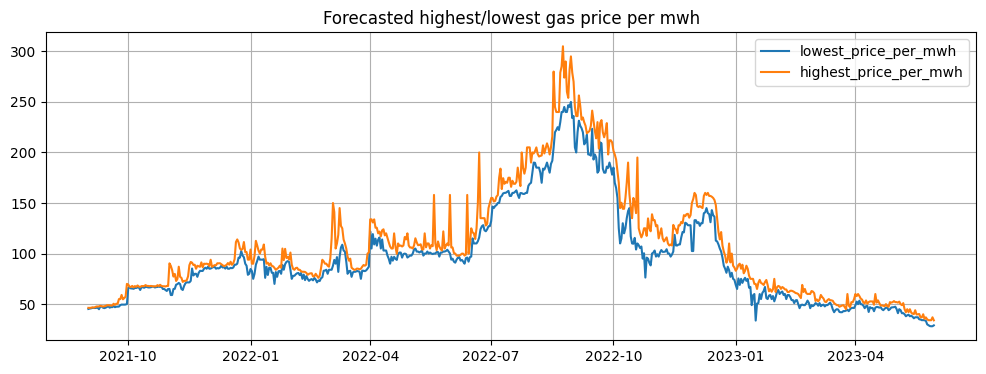

In [0]:
data = spark.table("bronze.gas_prices").toPandas()
data['Date'] = pd.to_datetime(data['forecast_date'])
data = data.set_index('Date')
plt.figure(figsize=(12,4))
plt.plot(data['lowest_price_per_mwh'])
plt.plot(data['highest_price_per_mwh'])
plt.title("Forecasted highest/lowest gas price per mwh")
plt.grid(True)
plt.legend(['lowest_price_per_mwh', 'highest_price_per_mwh'])
plt.show()

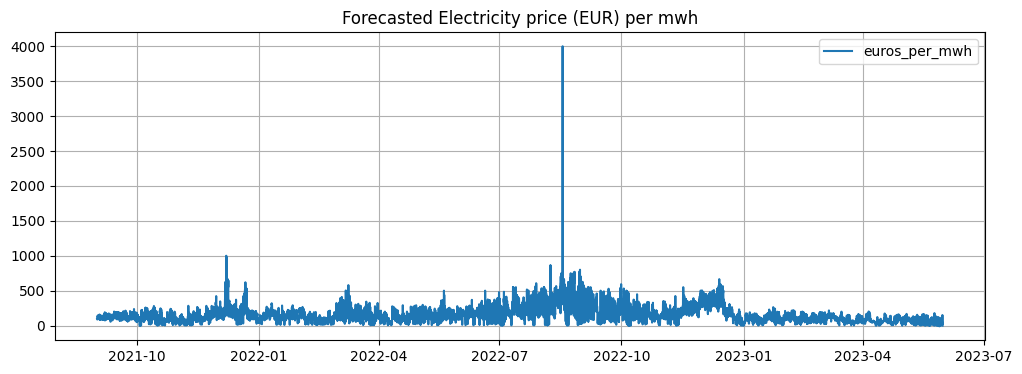

In [0]:
data = spark.table("bronze.electricity_prices").toPandas()
data['Date'] = pd.to_datetime(data['forecast_date'])
data = data.set_index('Date')
plt.figure(figsize=(12,4))
plt.plot(data['euros_per_mwh'])
plt.title("Forecasted Electricity price (EUR) per mwh")
plt.grid(True)
plt.legend(['euros_per_mwh'])
plt.show()

**We observe some outliers in the electricity price, we might need to address it.**

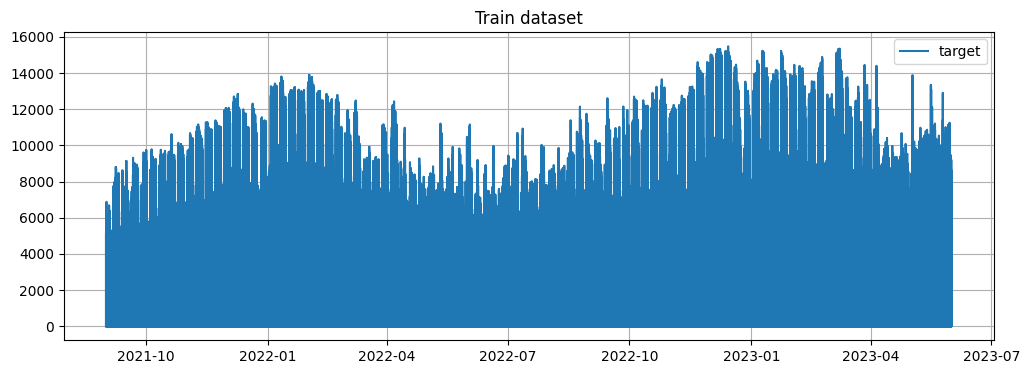

In [0]:
data = spark.table("bronze.train").toPandas()
data['Date'] = pd.to_datetime(data['datetime'])
data = data.set_index('Date')
plt.figure(figsize=(12,4))
plt.plot(data['target'])
plt.title("Train dataset")
plt.grid(True)
plt.legend(['target'])
plt.show()

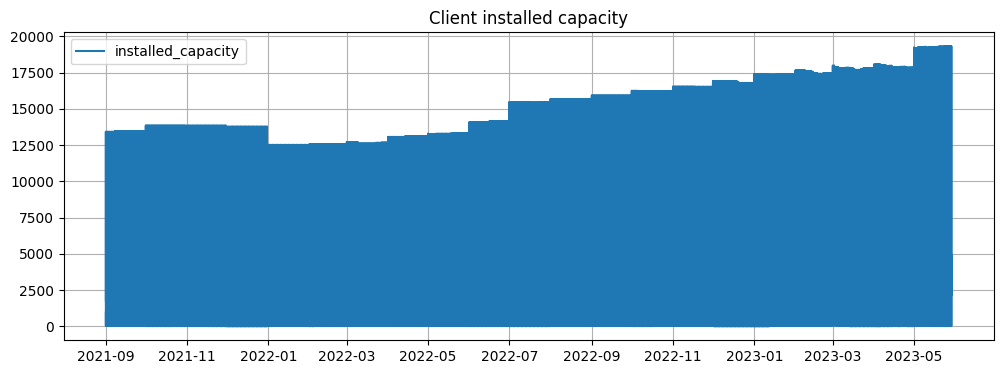

In [0]:
data = spark.table("bronze.client").toPandas()
data['Date'] = pd.to_datetime(data['date'])
data = data.set_index('Date')
plt.figure(figsize=(12,4))
plt.plot(data['installed_capacity'])
plt.title("Client installed capacity")
plt.grid(True)
plt.legend(['installed_capacity'])
plt.show()

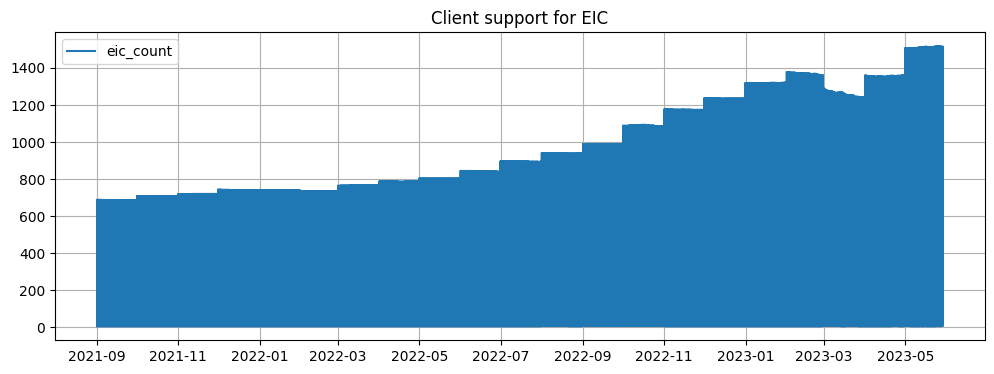

In [0]:
data = spark.table("bronze.client").toPandas()
data['Date'] = pd.to_datetime(data['date'])
data = data.set_index('Date')
plt.figure(figsize=(12,4))
plt.plot(data['eic_count'])
plt.title("Client support for EIC")
plt.grid(True)
plt.legend(['eic_count'])
plt.show()

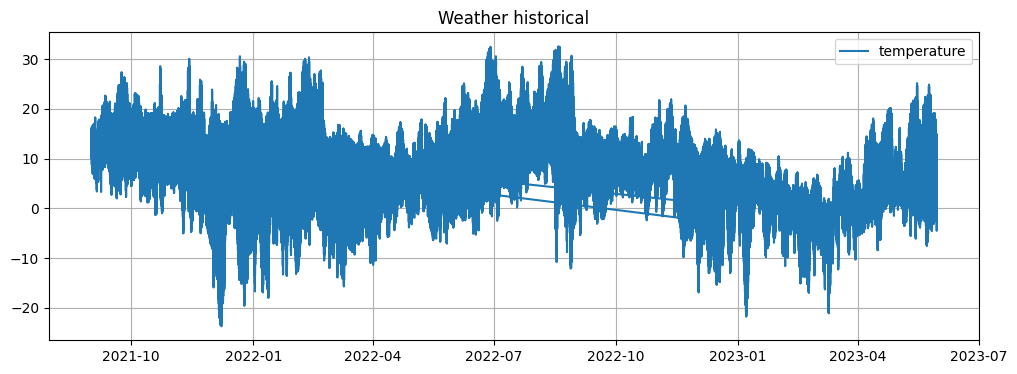

In [0]:
data = spark.table("bronze.weather_hist").toPandas()
data['Date'] = pd.to_datetime(data['datetime'])
data = data.set_index('Date')
plt.figure(figsize=(12,4))
plt.plot(data['temperature'])
plt.title("Weather historical")
plt.grid(True)
plt.legend(['temperature'])
plt.show()

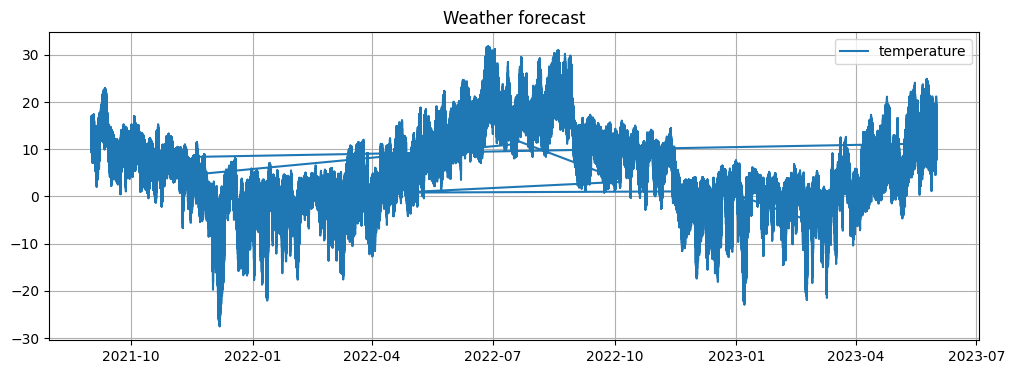

In [0]:
data = spark.table("bronze.weather_forecast").toPandas()
data['Date'] = pd.to_datetime(data['forecast_datetime'])
data = data.set_index('Date')
plt.figure(figsize=(12,4))
plt.plot(data['temperature'])
plt.title("Weather forecast")
plt.grid(True)
plt.legend(['temperature'])
plt.show()